In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from src import support as sp



#pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [2]:
df_full = pd.read_csv('../Files/full_data_clean.csv')
df_flight = pd.read_csv('../Files/flight_clean.csv')
df_loyalty = pd.read_csv('../Files/loyalty_clean.csv')


In [ ]:
# SORTING COLUMNS BY TYPE

numerics = df_full.select_dtypes(exclude = ['O','category']).columns
categorics = df_full.select_dtypes(exclude = 'number').columns

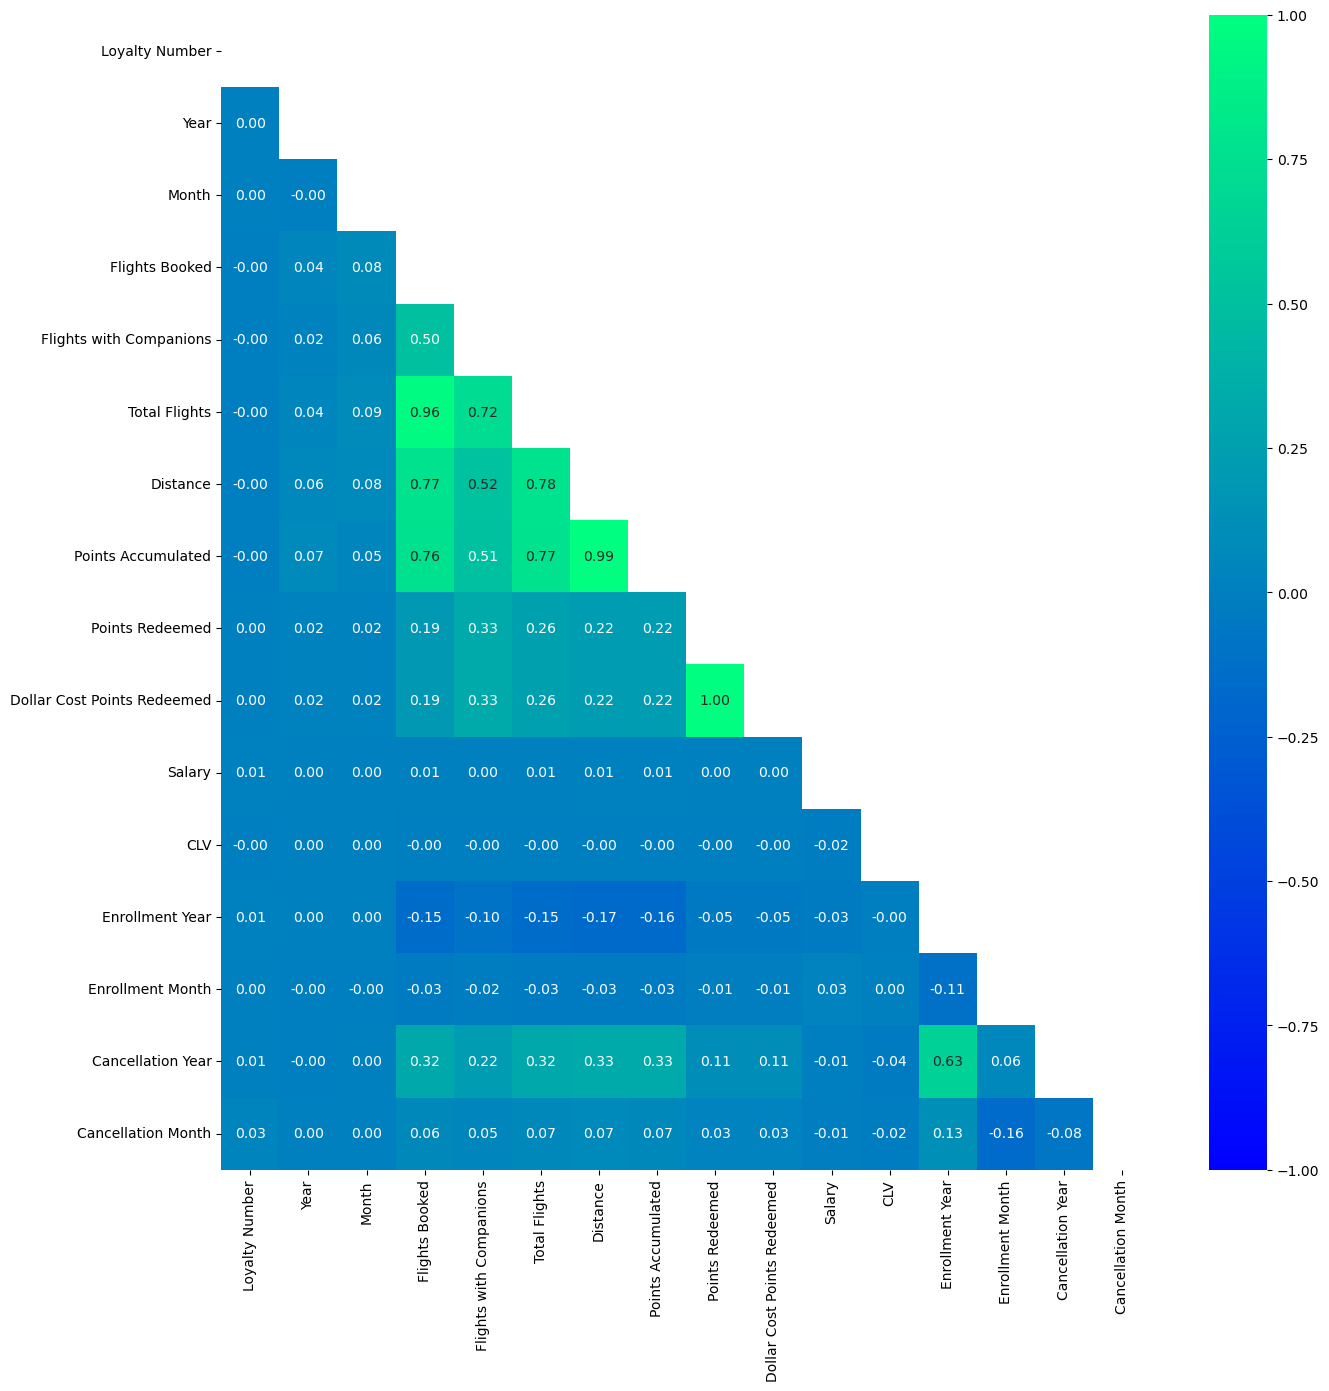

In [ ]:
# HEATMAP TO UNSDERSTAND CORRELATION BETWEEN VARIABLES

df_corr = df_full[numerics].corr(method = 'pearson')

plt.figure(figsize = (15, 15))

mask = np.triu(np.ones_like(df_corr, dtype=bool))

sns.heatmap(df_corr, 
            annot = True, 
            fmt = ".2f", # FORMAT FOR 2 DECIMALS
            cmap = "winter", # COLOR SCHEME
            vmax = 1, 
            vmin = -1, 
            mask = mask); 


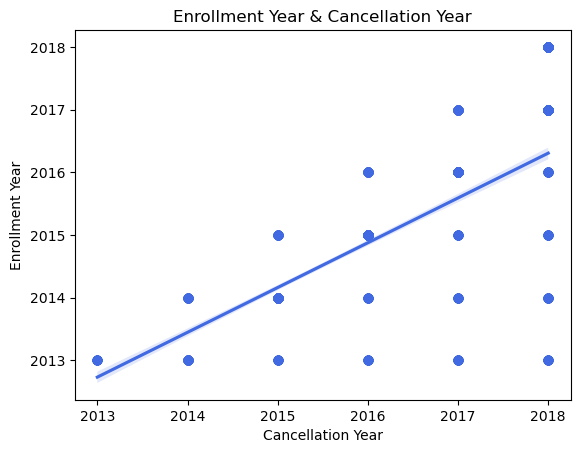

'There is a strong positive relation between the amount of new clients and cancelation'

In [180]:
# ANALYSING STRONG CORRELATION BETWEEN THESE VARIABLES

sns.regplot(data=df_loyalty, 
            y='Enrollment Year', 
            x='Cancellation Year', 
            color = 'royalblue')

plt.title('Enrollment Year & Cancellation Year')
plt.show() # TO OCULT COMMENTS

"""There is a strong positive relation between the amount of new clients and cancelation"""


In [ ]:
df_loyalty[df_loyalty['Salary'] < 0]

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
1082,542976,Canada,Quebec,Montreal,H2Y 4R4,Male,High School or Below,-49830.0,Divorced,Star,24127.50,2018 Promotion,2018,3,NaN,NaN
1894,959977,Canada,British Columbia,Vancouver,V5R 1W3,Female,Bachelor,-12497.0,Married,Aurora,9453.00,2018 Promotion,2018,3,NaN,NaN
2471,232755,Canada,British Columbia,Vancouver,V1E 4R6,Female,Bachelor,-46683.0,Single,Nova,4787.81,2018 Promotion,2018,3,NaN,NaN
3575,525245,Canada,British Columbia,Victoria,V10 6T5,Male,Bachelor,-45962.0,Married,Star,2402.33,2018 Promotion,2018,3,NaN,NaN
3932,603070,Canada,British Columbia,West Vancouver,V6V 8Z3,Female,Bachelor,-19325.0,Single,Star,2893.74,2018 Promotion,2018,3,NaN,NaN
4712,491242,Canada,British Columbia,Dawson Creek,U5I 4F1,Male,Bachelor,-43234.0,Married,Star,7597.91,2018 Promotion,2018,3,NaN,NaN
6560,115505,Canada,Newfoundland,St. John's,A1C 6H9,Male,Bachelor,-10605.0,Married,Nova,5860.17,2018 Promotion,2018,4,NaN,NaN
6570,430398,Canada,Newfoundland,St. John's,A1C 6H9,Male,Bachelor,-17534.0,Married,Nova,49423.80,2018 Promotion,2018,3,NaN,NaN
7373,152016,Canada,Ontario,Toronto,P1J 8T7,Female,Bachelor,-58486.0,Married,Aurora,5067.21,2018 Promotion,2018,2,NaN,NaN
8576,194065,Canada,Ontario,Sudbury,M5V 1G5,Female,Bachelor,-31911.0,Married,Nova,2888.85,2018 Promotion,2018,2,NaN,NaN


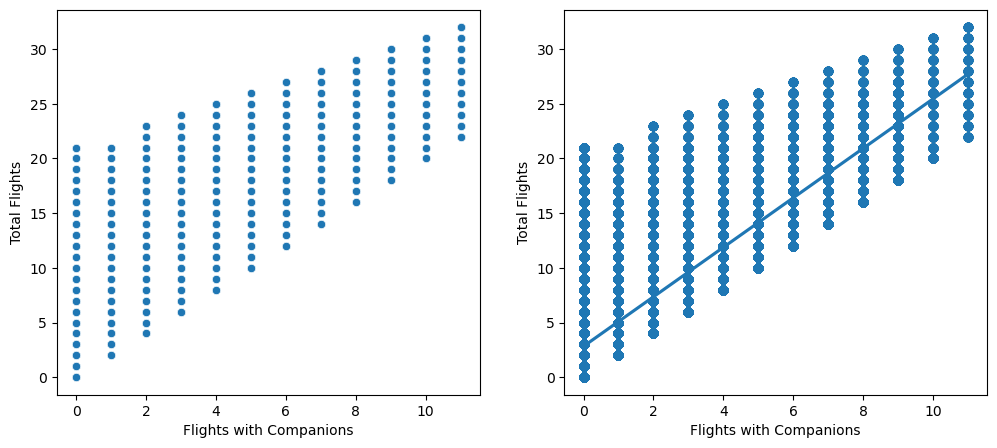

In [178]:
# APPLYING METHOD TO ANALIZE 2 NUMERIC VALUES USING DIFFERENT GRAPHIC TYPES - TESTING ONLY

sp.num_and_num (df_full,'Flights with Companions', 'Total Flights')

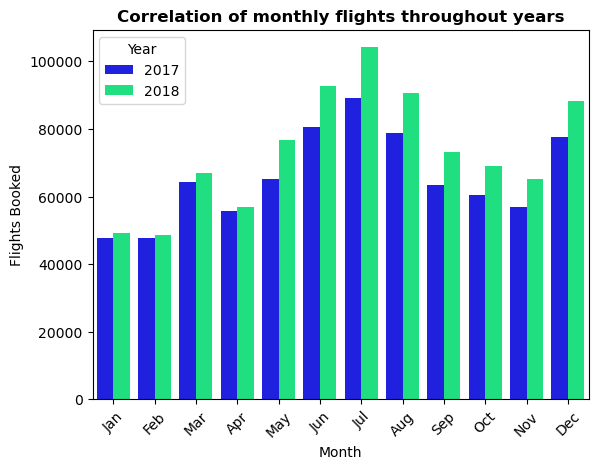

'\nIt is notable the consistency on the amoutn of monthly flights on both years. \nIt is also understandable the increase on flights on 2018 compared to previous year'

In [171]:
# CORRELATION MONTHLY FLIGHTS AND BOOKINGS

df_m_y = df_full.groupby(['Year', 'Month'])['Flights Booked'].sum().reset_index() # GROUP BY MONTH AND YEAR, THAN ADD BOOKED

month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

df_m_y['Month'] = df_m_y['Month'].apply(lambda x: month_names[x - 1]) # REPLACING NUMBERS ON RANGE FOR MONTHS, PROVIDED LIST AND INDEX TO REPLACE

sns.barplot(data=df_m_y, x='Month', 
            y='Flights Booked', 
            hue='Year', 
            palette='winter')

plt.xticks(rotation=45) # ROTATION TO NOT OVERLAY
plt.title('Correlation of monthly flights throughout years', fontweight='bold')
plt.show() # TO OCULT COMMENTS

"""
It is notable the consistency on the amoutn of monthly flights on both years. 
It is also understandable the increase on flights on 2018 compared to previous year"""

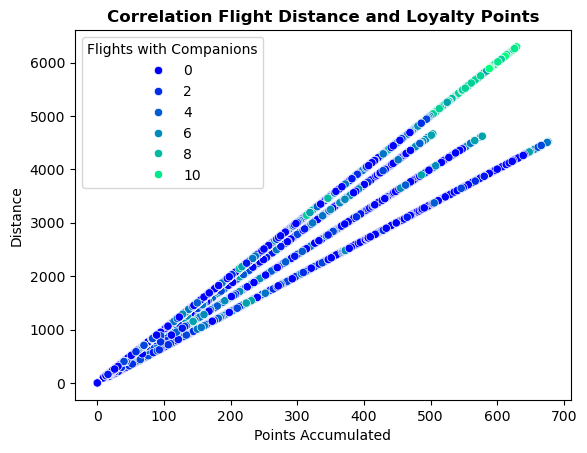

'\nThere is a clear positive correlation between these variables, as both increase simultaneously. \nIt can be stated that for every 1,000 units of distance, there is an increase of 100 points, which represents an average of 10%.\n\nThe heatmap highlights this correlation, and the graph also shows data for flights with companions.\nAnother interesting insight is that flights with companions are often associated with longer distances.\n'

In [172]:
# CORRELATION DISTANCY AND ACCUMULATED POINTS

sns.scatterplot(data=df_full,
                y='Distance', 
                x='Points Accumulated', 
                hue='Flights with Companions', 
                palette='winter')

plt.title('Correlation Flight Distance and Loyalty Points', fontweight='bold')
plt.show()


"""
There is a clear positive correlation between these variables, as both increase simultaneously. 
It can be stated that for every 1,000 units of distance, there is an increase of 100 points, which represents an average of 10%.

The heatmap highlights this correlation, and the graph also shows data for flights with companions.
Another interesting insight is that flights with companions are often associated with longer distances.
"""

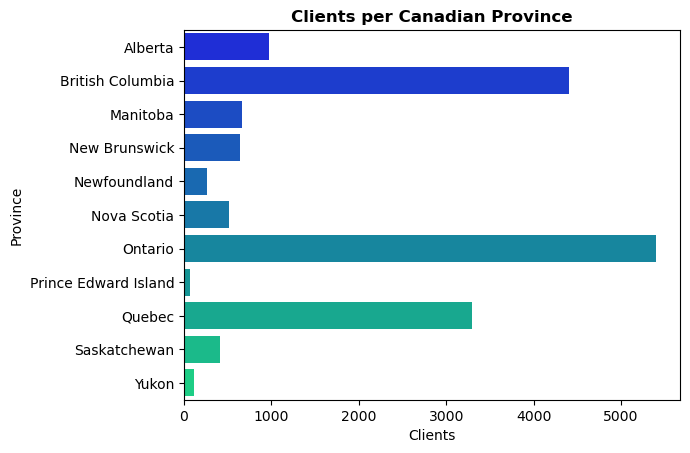

'\nThe grafic represents that Ontario, British Colombia and Quebec are the ones with more clients.\nRelation that is expected considering they are the most populated provinces(external source).\n'

In [173]:
# CORRETATION OF CLIENTS BY PROVINCES
df_c_p = df_full.groupby('Province')['Loyalty Number'].nunique().reset_index() 
sns.barplot(data=df_c_p, y='Province', 
            x='Loyalty Number', 
            hue= 'Province', 
            palette='winter')

plt.xlabel('Clients') # THE COUNTER IS BASED ON LOYALTY NUMBER, X WAS RENAMED TO BETTER REPRESENT THE DATA
plt.title('Clients per Canadian Province', fontweight='bold')
plt.show()

"""
The grafic represents that Ontario, British Colombia and Quebec are the ones with more clients.
Relation that is expected considering they are the most populated provinces(external source).
"""

In [174]:
# CORRELATIONN SALARY AND EDUCATION LEVEL FROM CLIENTS/ NOT CONSIDERING NULLS

correctorder = ['Low', 'Medium', 'High']
df_full['Salary Scale'] = pd.Categorical(df_full['Salary Scale'], 
                                         categories=correctorder, 
                                         ordered=True) # ADDED TO CORRECT ORDER BY THE LIST, NOT ALPHABETICALY AS DEFAULT

cross_cate = pd.crosstab(df_full['Salary Scale'], 
                         df_full['Education'])
cross_cate

Education,Bachelor,Doctor,High School or Below,Master
Salary Scale,,,,
Low,252567,5738,18915,12287
Medium,0,10721,0,0
High,0,1272,0,0


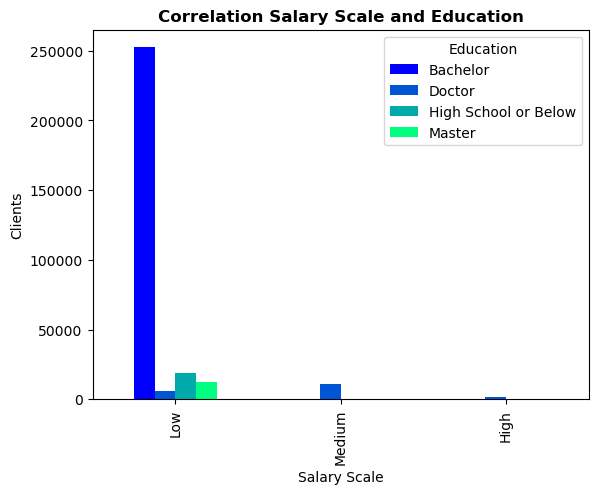

'\nFirst, you can observe that the majority of the clients have a bachelor degree and have low salary in the range.\nFollowed by a small representation of other education level in this salary range.\n\nSecond, clients with doctor degree are predominant classified as medium salary and high salary range\n\n'

In [175]:
# CORRELATIONN SALARY AND EDUCATION LEVEL FROM CLIENTS
cross_cate.plot(kind='bar', 
                stacked=False, 
                colormap='winter')

plt.title('Correlation Salary Scale and Education',fontweight='bold')
plt.xlabel('Salary Scale')
plt.ylabel('Clients')
plt.legend(title='Education')
plt.show()

"""
First, you can observe that the majority of the clients have a bachelor degree and have low salary in the range.
Followed by a small representation of other education level in this salary range.

Second, clients with doctor degree are predominant classified as medium salary and high salary range

"""

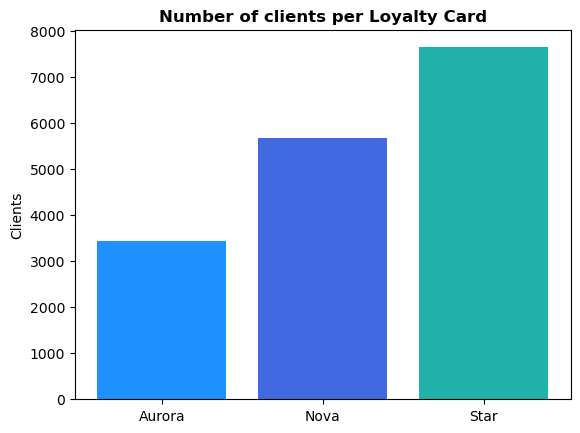

In [177]:
# PROPORTION OF CLIENTS AND LOYALTY CARDS

df_lc_ln = df_full.groupby('Loyalty Card')['Loyalty Number'].nunique().reset_index() # GROUPING BY CARD TYPE AND COUNTING UNIQUE VALUES


plt.bar(df_lc_ln['Loyalty Card'], 
        df_lc_ln['Loyalty Number'], 
        color=['dodgerblue', 'royalblue', 'lightseagreen'])

plt.ylabel('Clients')
plt.title('Number of clients per Loyalty Card',fontweight='bold')
plt.show()

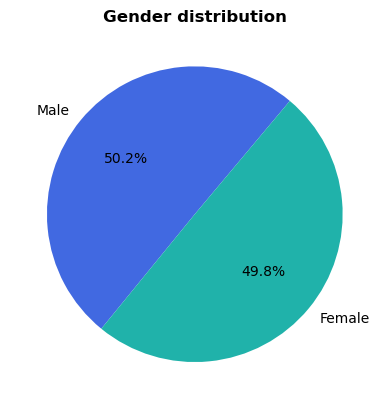

In [ ]:
df_g = df_full['Gender'].value_counts() # PLOT 1 INITIAL DRAFT

plt.pie(df_g , autopct='%1.1f%%', colors=['royalblue', 'lightseagreen'], labels=['Male','Female'],startangle=50)
plt.title('Gender distribution', fontweight='bold')
plt.show()


Text(0.5, 1.0, 'Gender distribution by Province')

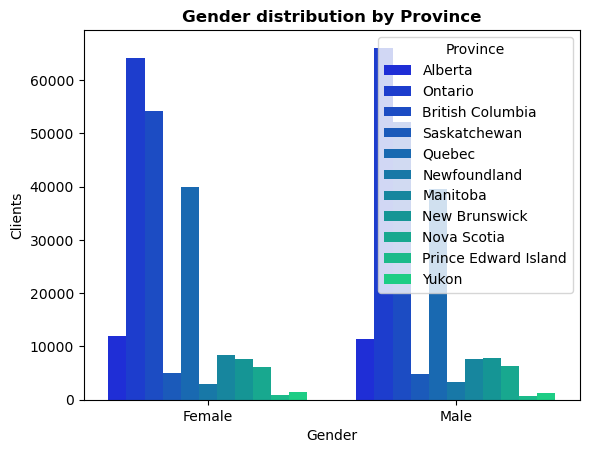

In [ ]:
sns.countplot(x='Gender', data= df_full, palette='winter', hue='Province')  # PLOT 2 INITIAL DRAFT
plt.ylabel('Clients')
plt.title('Gender distribution by Province',fontweight='bold')


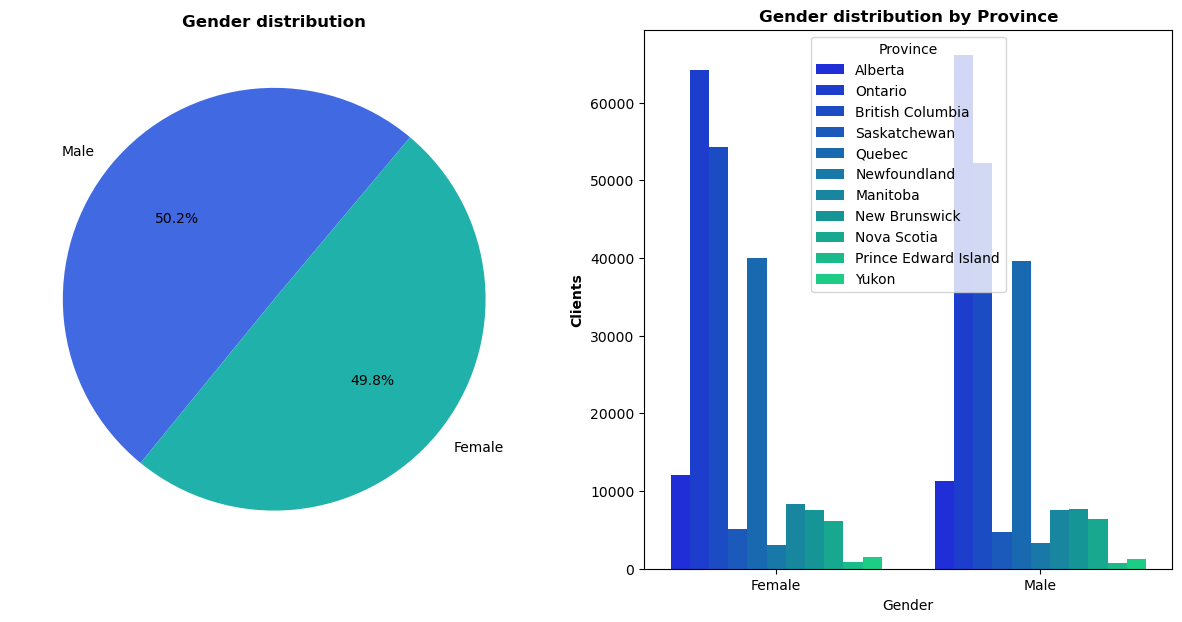

In [ ]:
# PLOTS COMBINED 

fig, axes = plt.subplots(1, 2, figsize=(15, 7)) 


# FIRST SUBPLOT:

axes[0].pie(df_g, # INDEXING THE GRAPHIC POSITION ON THE PLOTS
            autopct='%1.1f%%', 
            colors=['royalblue', 'lightseagreen'], 
            labels=['Male', 'Female'], 
            startangle=50)
axes[0].set_title('Gender distribution', fontweight='bold') # ADDING TITLE TO THIS GRAPHIC



# SECOND SUBPLOT

sns.countplot(x='Gender', # DOES NOT REQUIRE INDEXATION, SINCE ONLY ONE IS LEFT
              data=df_full, 
              palette='winter', 
              hue='Province', 
              ax=axes[1])  # Specify the axis for the countplot
axes[1].set_ylabel('Clients', fontweight='bold')
axes[1].set_title('Gender distribution by Province', fontweight='bold')

plt.show()